In [1]:
#data manipulation tools
import numpy as np
import pandas as pd
import re
import plotly
import numpy as np
import scipy as sp
from scipy import stats
from plotly.graph_objs import Bar, Layout, Scatter, Box, Margin, Figure

#data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
%matplotlib inline

In [3]:
f = open('./Data/data_description.txt', 'r')    # 'r' for read
lines = f.readlines()
f.close()

lines
# text = ''.join(lines)
# print(text)

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

In [4]:
for i in range(1,len(lines)):
    x = re.search(":",lines[i], re.IGNORECASE)
    if x:
        if re.search("(?<!story):",lines[i+2], re.IGNORECASE):
            print(type(x))
            

<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>
<class '_sre.SRE_Match'>


In [5]:
re.search(":", lines[0]).start()

10

In [6]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
df = train.append(test,ignore_index=True)

In [7]:
print(train.shape)
print(test.shape)
print([print(i+":", df[i].unique().tolist()) for i in df.columns if type(df[i][1])==str])
sorted(df.MSSubClass.unique())

(1460, 81)
(1459, 80)
BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
BsmtCond: ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtExposure: ['No', 'Gd', 'Mn', 'Av', nan]
BsmtFinType1: ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
BsmtFinType2: ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
BsmtQual: ['Gd', 'TA', 'Ex', nan, 'Fa']
CentralAir: ['Y', 'N']
Condition1: ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2: ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
Electrical: ['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan]
ExterCond: ['TA', 'Gd', 'Fa', 'Po', 'Ex']
ExterQual: ['Gd', 'TA', 'Ex', 'Fa']
Exterior1st: ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock', nan]
Exterior2nd: ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]

In [8]:
def fix_values(dfcol, oldvalues, newvalues):
    for i in range(0,len(oldvalues)):
        print(oldvalues[i] + " to " +newvalues[i])
        dfcol = [newvalues[i] if x == oldvalues[i] else x for x in dfcol]
    return(dfcol)
    
train.MSZoning = fix_values(train.MSZoning, ("C (all)",),("C",))
test.MSZoning = fix_values(test.MSZoning, ("C (all)",), ("C",))
train.Neighborhood = fix_values(train.Neighborhood, ("NAmes",),("Names",))
test.Neighborhood = fix_values(test.Neighborhood, ("NAmes",),("Names",))
train.BldgType = fix_values(train.BldgType, ("2fmCon", "Duplex", "Twnhs"), ("2FmCon", "Duplx", "TwnhsI"))
test.BldgType = fix_values(test.BldgType, ("2fmCon", "Duplex", "Twnhs"), ("2FmCon", "Duplx", "TwnhsI"))
train.BldgType = fix_values(train.BldgType, ("Wd Shng", "CmentBd", "Brk Cmn"), ("Wd Sdng", "CemntBd", "BrkComm"))
test.BldgType = fix_values(test.BldgType, ("Wd Shng", "CmentBd", "Brk Cmn"), ("Wd Sdng", "CemntBd", "BrkComm"))


# train.Neighborhood = ["Names" if x == "NAmes" else x for x in train.Neighborhood]
# test.Neighborhood = ["Names" if x == "NAmes" else x for x in test.Neighborhood]
train.BldgType.unique()


C (all) to C
C (all) to C
NAmes to Names
NAmes to Names
2fmCon to 2FmCon
Duplex to Duplx
Twnhs to TwnhsI
2fmCon to 2FmCon
Duplex to Duplx
Twnhs to TwnhsI
Wd Shng to Wd Sdng
CmentBd to CemntBd
Brk Cmn to BrkComm
Wd Shng to Wd Sdng
CmentBd to CemntBd
Brk Cmn to BrkComm


array(['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], dtype=object)

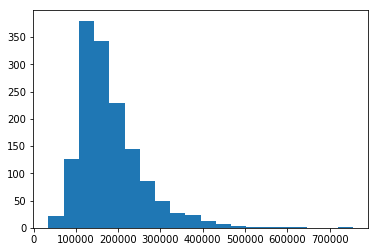

In [9]:
plt.hist(train['SalePrice'], bins=20)
train['bcSalePrice'], _ = stats.boxcox(train['SalePrice'])
train['logSalePrice'] = np.log(train["SalePrice"])

(array([   5.,    0.,    4.,    8.,    8.,   46.,   57.,  127.,  228.,
         242.,  238.,  162.,  134.,   86.,   61.,   29.,   15.,    4.,
           4.,    2.]),
 array([ 10.46024211,  10.61395365,  10.7676652 ,  10.92137675,
         11.07508829,  11.22879984,  11.38251138,  11.53622293,
         11.68993448,  11.84364602,  11.99735757,  12.15106911,
         12.30478066,  12.45849221,  12.61220375,  12.7659153 ,
         12.91962684,  13.07333839,  13.22704994,  13.38076148,  13.53447303]),
 <a list of 20 Patch objects>)

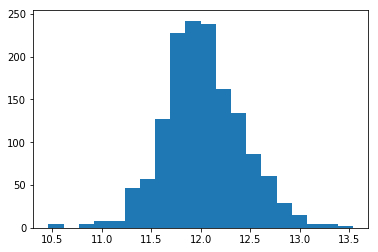

In [10]:
plt.hist(train['logSalePrice'], bins=20)

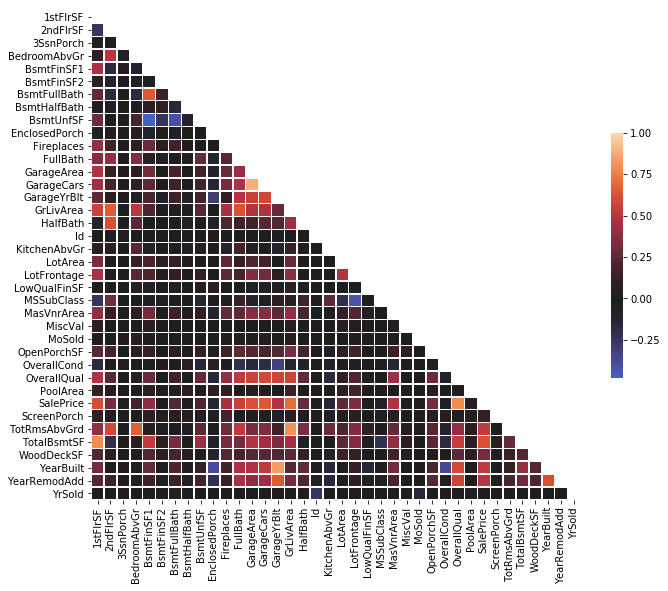

In [11]:
df = df.sort_values('SalePrice', ascending=False)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
train["Date"] = pd.to_datetime(dict(year=train["YrSold"], month=train["MoSold"], day=1))
train["Date"]

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
5      2009-10-01
6      2007-08-01
7      2009-11-01
8      2008-04-01
9      2008-01-01
10     2008-02-01
11     2006-07-01
12     2008-09-01
13     2007-08-01
14     2008-05-01
15     2007-07-01
16     2010-03-01
17     2006-10-01
18     2008-06-01
19     2009-05-01
20     2006-11-01
21     2007-06-01
22     2008-09-01
23     2007-06-01
24     2010-05-01
25     2009-07-01
26     2010-05-01
27     2010-05-01
28     2006-12-01
29     2008-05-01
30     2008-07-01
31     2008-06-01
32     2008-01-01
33     2010-04-01
34     2007-08-01
35     2006-09-01
36     2009-06-01
37     2009-10-01
38     2010-01-01
39     2008-06-01
40     2006-12-01
41     2007-07-01
42     2007-12-01
43     2008-07-01
44     2006-05-01
45     2010-02-01
46     2009-08-01
47     2007-07-01
48     2009-06-01
49     2007-01-01
50     2007-07-01
51     2006-09-01
52     2010-05-01
53     2006-11-01
54     2007-02-01
55     200

In [14]:
housesales = pd.read_csv('./Data/MSPNHSUS.csv')
housesales["DATE"] = pd.to_datetime(housesales["DATE"],format="%Y-%m-%d")


In [15]:
train = pd.merge(train,housesales, left_on= "Date", right_on="DATE", how = "outer")

0.00164737036244


(array([  50.,   61.,    6.,  169.,   30.,  131.,   67.,   54.,   89.,
          61.,  126.,  219.,   28.,  159.,   87.,   65.,    0.,   13.,
          27.,   23.]),
 array([ 204200.,  207120.,  210040.,  212960.,  215880.,  218800.,
         221720.,  224640.,  227560.,  230480.,  233400.,  236320.,
         239240.,  242160.,  245080.,  248000.,  250920.,  253840.,
         256760.,  259680.,  262600.]),
 <a list of 20 Patch objects>)

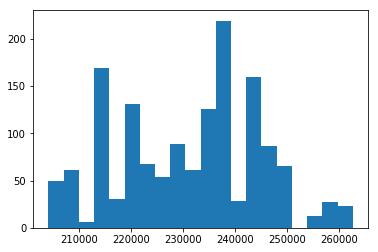

In [21]:
print(train["MSPNHSUS"].corr(train["SalePrice"]))
plt.hist(train['MSPNHSUS'], bins=20)
# plt.figure(figsize=(12,6))

# x = df.groupby('country')['imdb_score'].median().sort_values(ascending=False)
# x.plot.bar(color='b')

In [16]:
# '''
# ERRORS NOTICED:
# MSZoning - 
#     C (all) to C
#     NOTE NO AGRICULTURE
#     Contains NAN which is not listed
    
# Neighborhood -
#     NAmes to Names

# BldgType -
#     2fmCon to 2FmCon
#     Duplex to Duplx
#     Twnhs to Twnhsl(?)
#     contains nan which is no part 

# Exterior2nd -
#     Wd Shng to WdShing
#     CemntBd to CemntBd
#     Brk Cmn to BrkComm
# '''

# '''   
# Utilities -
#     contains nan
#     no NoSeWa
    
# condition2 -
#     No RRNe
# '''